## Лабораторная работа № 05 (предварительный анализ данных)
### Задание 1: Детекция аномалий в данных кредитного скоринга
Используйте набор данных кредитного скоринга с Kaggle ([ссылка на данные](https://www.kaggle.com/mlg-ulb/creditcardfraud)) и определите аномалии в данных, используя Z-score или IQR. 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, StandardScaler, RobustScaler, Normalizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [81]:
credit_card_ds = pd.read_csv("data/creditcard.csv")
credit_card_ds

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


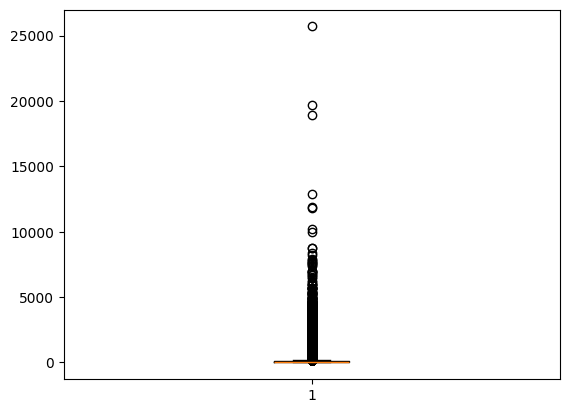

In [82]:
plt.boxplot(credit_card_ds['Amount'])
plt.show()

In [83]:
z_scores = np.abs(stats.zscore(credit_card_ds['Amount']))
z_scores

array([0.24496426, 0.34247454, 1.16068593, ..., 0.0818393 , 0.31324853,
       0.51435531], shape=(284807,))

In [84]:
anomalies = credit_card_ds[z_scores > 3]
anomalies

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
51,36.0,-1.004929,-0.985978,-0.038039,3.710061,-6.631951,5.122103,4.371691,-2.006868,-0.278736,...,1.393406,-0.381671,0.969719,0.019445,0.570923,0.333278,0.857373,-0.075538,1402.95,0
89,59.0,-0.773293,-4.146007,-0.932038,0.027094,-1.698307,0.460188,0.737344,-0.314216,-0.842673,...,0.890978,0.026123,-1.134769,-0.654958,0.098386,-0.209150,-0.171709,0.208057,1142.02,0
140,87.0,-5.101877,1.897022,-3.458034,-1.277543,-5.517758,2.098366,3.329603,1.250966,0.271501,...,-0.871744,-0.678879,-0.555900,-0.761660,0.066611,0.767227,0.731634,-0.860310,919.60,0
150,93.0,-1.640014,-0.479831,1.613630,2.997979,-3.803788,5.051812,3.315254,-0.303785,0.671395,...,-0.367933,0.641891,-0.405779,-1.268700,0.494090,0.610967,0.608993,-0.410034,937.69,0
164,103.0,-6.093248,-12.114213,-5.694973,3.294389,-1.413792,4.776000,4.808426,-0.228197,-0.525896,...,2.228823,-2.264037,-3.553381,1.215279,-0.406073,-0.653384,-0.711222,0.672900,3828.04,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284249,172273.0,-9.030538,-11.112584,-16.233798,3.592021,-40.427726,23.917837,44.054461,-7.277778,-4.210637,...,-0.269048,0.988144,7.040028,0.347693,2.520869,2.342495,3.478175,-2.713136,10199.44,0
284290,172305.0,0.311762,-2.602832,-2.942923,1.880832,-0.090804,-0.480139,1.865720,-0.549267,-0.303862,...,0.718151,0.220383,-0.913711,-0.332605,0.278026,-0.474820,-0.200782,0.073386,897.00,0
284383,172397.0,-0.065120,-4.114668,-2.106854,-0.137339,-1.384530,0.239999,0.893833,-0.257922,1.145888,...,0.395868,-1.244969,-0.686403,-0.963878,-0.924685,0.210599,-0.253408,0.125687,1114.00,0
284497,172498.0,-0.801222,-4.874934,-3.195666,1.177224,-1.299393,-0.397073,2.192428,-0.603173,0.358854,...,0.778143,-1.011155,-1.160277,-0.266300,-0.523929,-0.233779,-0.338745,0.180252,1484.66,0


In [85]:
q1 = np.percentile(credit_card_ds['V1'], 25)
q3 = np.percentile(credit_card_ds['V1'], 75)
iqr = q3 - q1
print(f"IQR = {iqr}")
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = [x for x in credit_card_ds['V1'] if x < lower_bound or x > upper_bound]
print(outliers)

IQR = 2.236015078268187
[-5.40125766315825, -4.57509260816239, -5.10187714438251, -5.28597051304752, -6.09324780457494, -4.81602179918938, -4.63653366354065, -5.85246510836535, -5.16629893298859, -4.70107431737014, -5.27395223265643, -6.16966448425131, -4.47901374259381, -11.1407063576909, -4.55454496331659, -4.52652136630502, -4.42295223433286, -4.48116251800798, -4.28537601357866, -5.84922564416002, -4.64661398624051, -5.14963802162277, -4.46805066670965, -4.70994553342808, -5.10469219753115, -12.168192373698, -4.45418614146264, -4.38585389399309, -4.55397264645073, -7.54625563785945, -4.67946832975815, -10.7805648568976, -4.50854720124012, -4.3442341881649, -5.39019043350815, -5.94848151780053, -6.20011365114338, -4.38135154969887, -5.34294483033012, -5.15110354169386, -4.4150480885075, -5.91002799040294, -5.29342236019084, -6.73051854026315, -5.03639220527535, -4.3602415162394, -7.95597807453241, -5.39126604287285, -7.8965335417027, -4.73762195612414, -5.01809702398623, -5.80706335

In [86]:
X_0_25 = credit_card_ds['Amount'].quantile(0.25)
X_0_75 = credit_card_ds['Amount'].quantile(0.75)
IR = X_0_75 - X_0_25

# John Tukey rule
lower_bound = X_0_25 - 1.5 * IR
upper_bound = X_0_75 + 1.5 * IR

outliers = credit_card_ds[(credit_card_ds['Amount'] < lower_bound) | (credit_card_ds['Amount'] > upper_bound)]
outliers

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
20,16.0,0.694885,-1.361819,1.029221,0.834159,-1.191209,1.309109,-0.878586,0.445290,-0.446196,...,-0.295583,-0.571955,-0.050881,-0.304215,0.072001,-0.422234,0.086553,0.063499,231.71,0
51,36.0,-1.004929,-0.985978,-0.038039,3.710061,-6.631951,5.122103,4.371691,-2.006868,-0.278736,...,1.393406,-0.381671,0.969719,0.019445,0.570923,0.333278,0.857373,-0.075538,1402.95,0
64,42.0,-0.522666,1.009923,0.276470,1.475289,-0.707013,0.355243,1.559849,-0.399579,-0.479813,...,0.172401,1.011543,0.069666,0.157820,-1.109224,-0.302369,0.318170,0.316910,243.66,0
85,55.0,-4.575093,-4.429184,3.402585,0.903915,3.002224,-0.491078,-2.705393,0.666451,1.922216,...,-0.047365,0.853360,-0.971600,-0.114862,0.408300,-0.304576,0.547785,-0.456297,200.01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284735,172727.0,-1.661169,-0.565425,0.294268,-1.549156,-2.301359,2.365956,-0.248881,-0.857361,0.137784,...,1.432397,-0.257828,-0.072471,-1.035804,-0.437889,-0.238543,0.365302,-0.448621,381.05,0
284748,172738.0,1.634178,-0.486939,-1.975967,0.495364,0.263635,-0.713049,0.459925,-0.336879,0.743676,...,-0.113197,-0.493594,0.001993,0.602533,-0.049936,-0.145522,-0.040554,0.024884,220.28,0
284753,172743.0,1.465737,-0.618047,-2.851391,1.425282,0.893893,-0.958325,1.508074,-0.625691,-0.369824,...,0.500426,0.870491,-0.495410,0.676929,0.787688,-0.254918,-0.117200,-0.014737,337.54,0
284757,172745.0,-1.757643,-0.982659,1.091540,-1.409539,-0.662159,0.046930,0.173241,0.364812,1.143381,...,-0.191471,-0.432979,-0.292549,-0.281494,-0.484349,0.366751,-0.102628,-0.458915,200.00,0


### Задание 3: Обнаружение аномалий в данных о температуре
В наборе данных о температуре в различных городах ([прямая ссылка на данные Kaggle](https://www.kaggle.com/smid80/weatherww2)) обнаружьте аномальные значения температуры.

In [ ]:
weather = pd.read_csv("data/weather.csv")
weather

C:\Users\user\AppData\Local\Temp\ipykernel_9148\2654312542.py:1: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  weather = pd.read_csv("data/weather.csv")


,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119035,82506,1945-12-27,0,NaN,28.333333,18.333333,23.333333,0.0,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119036,82506,1945-12-28,9.906,NaN,29.444444,18.333333,23.888889,0.0,1.0,45,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
119037,82506,1945-12-29,0,NaN,28.333333,18.333333,23.333333,0.0,1.0,45,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
119038,82506,1945-12-30,0,NaN,28.333333,18.333333,23.333333,0.0,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
# weather = weather.drop_duplicates(subset='Date') 
weather = weather[weather['STA'] == 10001]
weather

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1152,10001,1945-8-27,T,NaN,28.333333,22.777778,25.555556,0.0,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1153,10001,1945-8-28,13.97,NaN,27.222222,22.222222,24.444444,0.0,1,45,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
1154,10001,1945-8-29,3.048,NaN,26.111111,22.222222,24.444444,0.0,1,45,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
1155,10001,1945-8-30,T,NaN,27.777778,22.777778,25.555556,0.0,1,45,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN


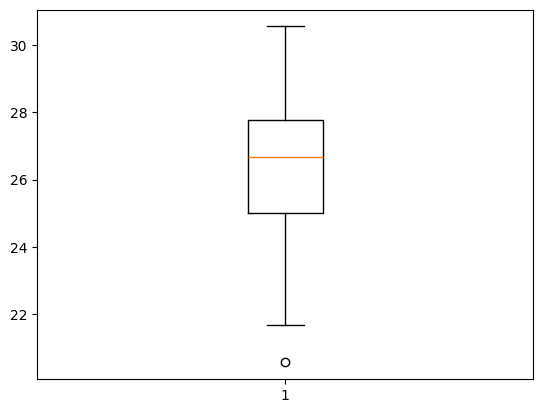

In [89]:
plt.boxplot(weather['MeanTemp'])
plt.show()

In [90]:
z_scores = np.abs(stats.zscore(weather['MeanTemp']))
anomalies = weather[z_scores > 3]
anomalies

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
408,10001,1943-8-13,0,NaN,21.111111,20.555556,20.555556,0.0,NaN,43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Задание 4: Прогнозирование пропущенных значений в данных о болезни диабета.
В данных о диабете Pima Indians (Kaggle: [ссылка на данные](https://www.kaggle.com/uciml/pima-indians-diabetes-database)) есть пропущенные значения. Воспользуйтесь методами регрессии или классификации для предсказания пропущенных значений.

<Axes: >

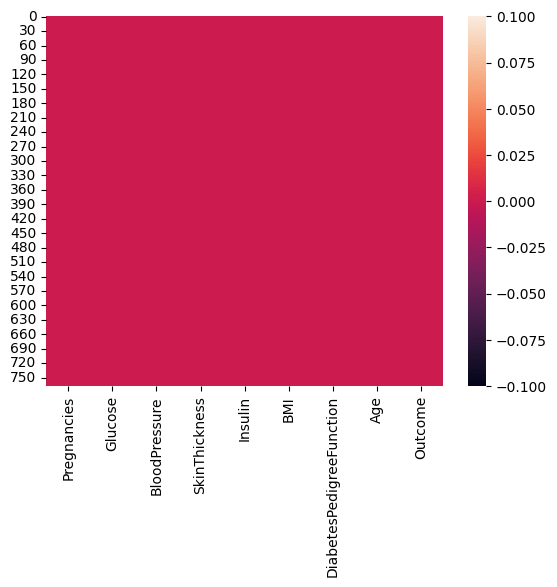

In [ ]:
diabetes = pd.read_csv("data/diabetes.csv")
sns.heatmap(diabetes.isna())

В датасете не оказалось пропусков, поэтому использую другой датасет

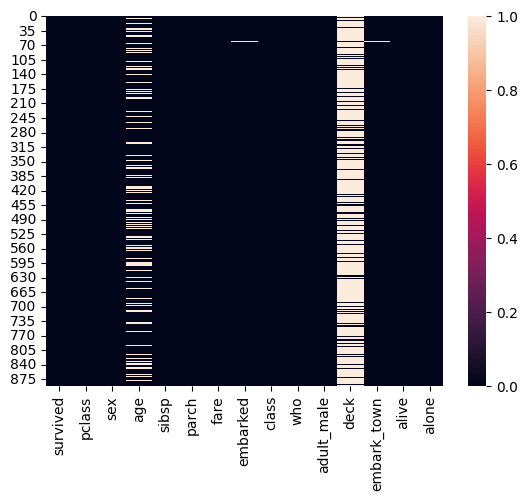

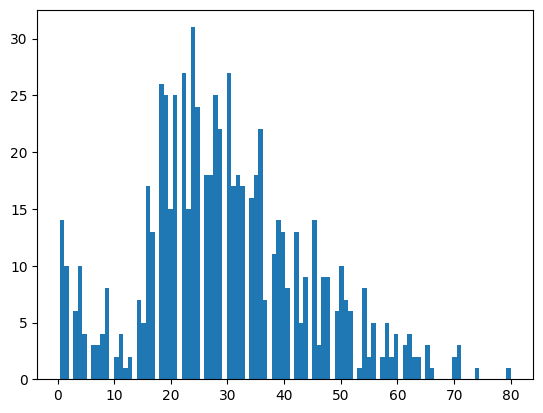

In [ ]:
titanic = sns.load_dataset("titanic")

X_features = ['sibsp', 'parch', 'fare']
y_feature = 'age'

plt.figure(0)
sns.heatmap(titanic.isna())
plt.figure(1)
plt.hist(titanic[y_feature], bins=100)
titanic

titanic_numeric = titanic[X_features + [y_feature]].copy()
titanic_numeric_no_na = titanic_numeric.dropna(subset=X_features)
known_age = titanic_numeric_no_na[titanic_numeric_no_na[y_feature].notna()]
unknown_age = titanic_numeric_no_na[titanic_numeric_no_na[y_feature].isna()]

X_train = known_age[X_features]
X_unknown = unknown_age[X_features]
y_train = known_age[y_feature]

model = LinearRegression()
model.fit(X_train, y_train)

X_unknown = unknown_age[X_features]
predicted_ages = model.predict(X_unknown)
predicted_ages = predicted_ages.clip(min=0)
predicted_ages = predicted_ages.round().astype(int)
titanic.loc[titanic[y_feature].isna(), y_feature] = predicted_ages

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,24.0,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


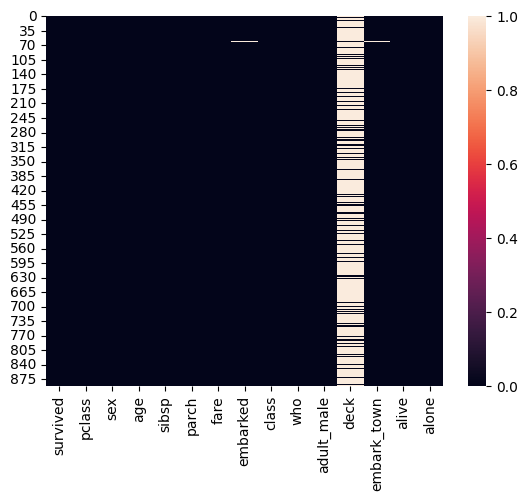

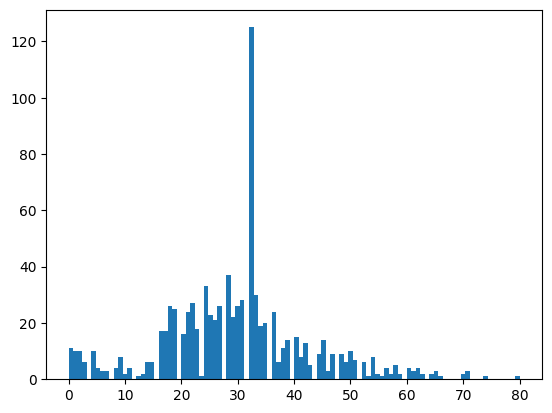

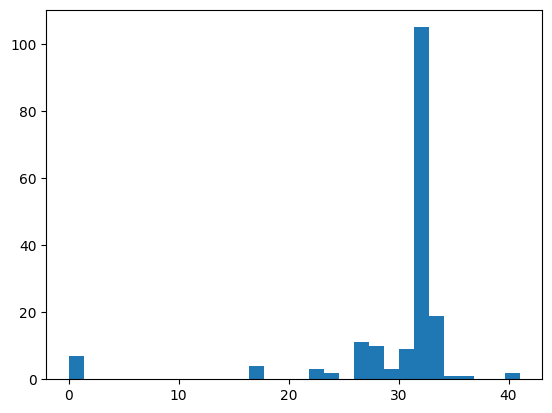

In [149]:
plt.figure(0)
sns.heatmap(titanic.isna())
plt.figure(1)
plt.hist(titanic[y_feature], bins=100)
plt.figure(2)
plt.hist(predicted_ages, bins=30)
titanic

### Задание 5: Обработка пропущенных значений
Используя набор данных о пассажирах Титаника из библиотеки Seaborn (sns.load_dataset('titanic')), необходимо найти и обработать все пропущенные значения. Можно использовать различные методы (например, удаление, заполнение средним значением или медианой). Сравнить результаты.

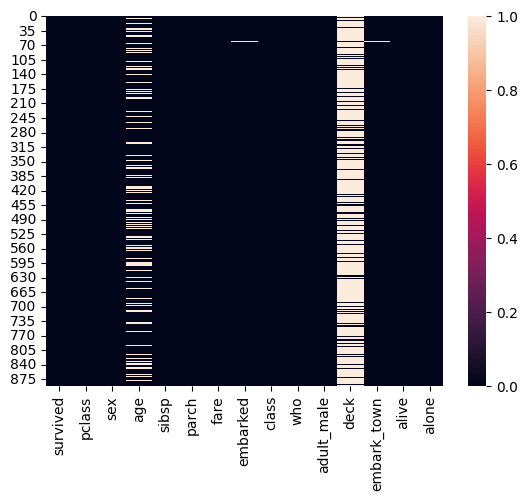

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [18]:
titanic = sns.load_dataset("titanic")
sns.heatmap(titanic.isna())
plt.show()
titanic

In [17]:
titanic_drop = titanic.dropna()
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
872,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


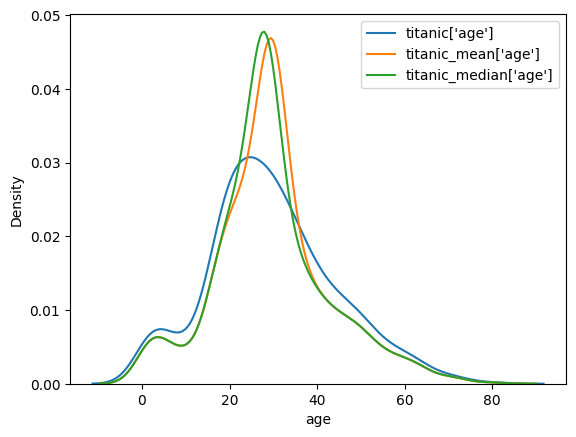

In [29]:
columns = ['fare', 'age']
titanic_mean = titanic.copy()
titanic_mean[columns] = titanic_mean[columns].fillna(titanic_mean[columns].mean())
columns = ['fare', 'age']
titanic_median = titanic.copy()
titanic_median[columns] = titanic_median[columns].fillna(titanic_median[columns].median())

sns.kdeplot(titanic['age'], label='titanic[\'age\']')
sns.kdeplot(titanic_mean['age'], label='titanic_mean[\'age\']')
sns.kdeplot(titanic_median['age'], label='titanic_median[\'age\']')
plt.legend()

### Задание 6: Нормализация и стандартизация признаков датасета "Red Wine Quality"
Для набора данных о качестве красного вина ([ссылка на данные](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009)) примените различные методы нормализации и стандартизации к признакам, сравните результаты их применения.


### **Min-Max Normalization**
$$x' = \frac{x - x_{\min}}{x_{\max} - x_{\min}}$$
### **MaxAbsScaler**
$$x' = \frac{x}{|x_{\max}|}$$
### **StandardScaler (Z-score нормализация)**
$$x' = \frac{x - \mu}{\sigma}$$
### **RobustScaler**
$$x' = \frac{x - \text{Median}(x)}{IQR}$$
### **Normalizer (L2-нормализация по строкам)**
$$x'_i = \frac{x_i}{\sqrt{\sum_{j=1}^{n} x_j^2}} $$

In [31]:
wine = pd.read_csv('data/winequality-red.csv')
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


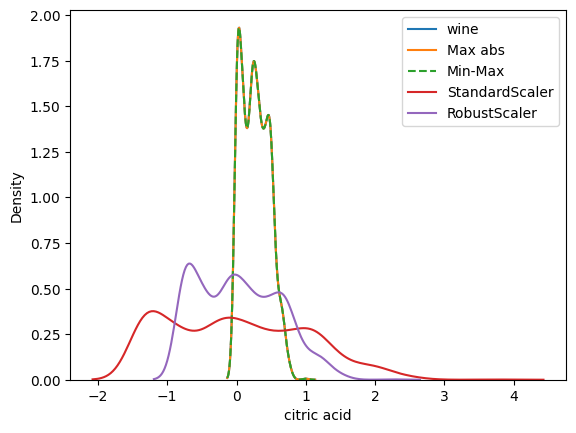

In [55]:
minmax_scaler = MinMaxScaler()
standard_scaler = StandardScaler()
robust_scaler = RobustScaler()
normalizer = Normalizer()
maxAbsScaller = MaxAbsScaler()
X_minmax = pd.DataFrame(minmax_scaler.fit_transform(wine), columns=wine.columns)
X_maxabs = pd.DataFrame(maxAbsScaller.fit_transform(wine), columns=wine.columns)
X_standard = pd.DataFrame(standard_scaler.fit_transform(wine), columns=wine.columns)
X_robust = pd.DataFrame(robust_scaler.fit_transform(wine), columns=wine.columns)
X_normalized = pd.DataFrame(normalizer.fit_transform(wine), columns=wine.columns)
sns.kdeplot(wine['citric acid'], label='wine')
sns.kdeplot(X_maxabs['citric acid'], label='Max abs')
sns.kdeplot(X_minmax['citric acid'], label='Min-Max', linestyle='--')
sns.kdeplot(X_standard['citric acid'], label='StandardScaler')
sns.kdeplot(X_robust['citric acid'], label='RobustScaler')
plt.legend()
plt.show()

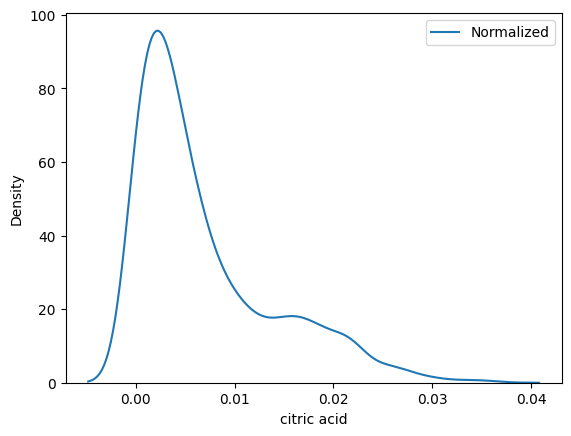

In [ ]:
sns.kdeplot(X_normalized['citric acid'], label='Normalized')
plt.legend()
plt.show()

## Задание 7: Применение описательной статистики и корреляционного анализа для датасета "House Prices"
На данных о ценах на жилье ([ссылка на данные](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)) рассчитайте основные метрики описательной статистики для числовых переменных и рассчитайте корреляции между переменными. Визуализируйте корреляции с помощью тепловых карт и обратите внимание на сильные корреляции.

In [57]:
house = pd.read_csv("data/houses.csv") 
house

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [72]:
numeric_cols = house.select_dtypes(include=['int64', 'float64']).drop('Id', axis=1)
desc_stats = numeric_cols.describe()
desc_stats

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


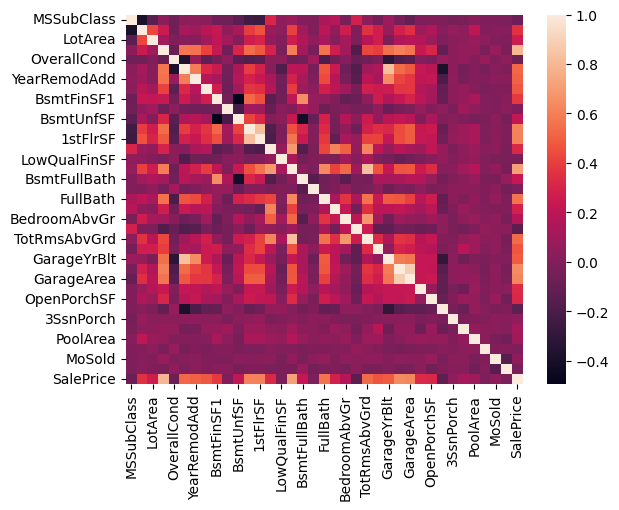

<Figure size 2000x1000 with 0 Axes>

In [73]:
corr_matrix = numeric_cols.corr()
sns.heatmap(corr_matrix)
plt.figure(figsize=(20, 10))
plt.show()


In [78]:
corr_target = corr_matrix['SalePrice'].sort_values(ascending=False)
corr_target

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

### Задание 8: Обработка текстовых данных в датасете "Twitter Airline Sentiment"
Набор данных "Twitter Airline Sentiment" на Kaggle ([ссылка на данные](https://www.kaggle.com/crowdflower/twitter-airline-sentiment)) содержит реальные твиты о различных авиакомпаниях. Примените техники предобработки текста, вроде удаления стоп-слов, стемминга, лемматизации и векторизации для подготовки данных к анализу.

In [79]:
tweets = pd.read_csv("data/Tweets.csv") 
tweets

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [95]:
stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer("english")
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    words = text.split()
    words = [w for w in words if w not in stop_words]
    words = [stemmer.stem(w) for w in words]
    words = [lemmatizer.lemmatize(w) for w in words]      
    return " ".join(words)

tweets['clean_text'] = tweets['text'].apply(preprocess_text)
tweets[['text', 'clean_text']].head()

vectorizer = CountVectorizer()
result = vectorizer.fit_transform(tweets['clean_text'])
display(result.toarray())
display(tweets)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(14640, 14191))

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,clean_text
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),@virginamerica what @dhepburn said.
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),@virginamerica plus ad commerci experience... ...
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),@virginamerica i today... must mean i need tak...
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),"@virginamerica realli aggress blast obnoxi ""en..."
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),@virginamerica realli big bad thing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN,@americanair thank got differ flight chicago.
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN,@americanair leav 20 minut late flight. no war...
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN,@americanair plea bring american airlin #black...
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada),"@americanair money, chang flight, answer phone..."
